In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the Data
bank_note_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

In [ ]:
# Check the first few rows of the data
bank_note_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


** Information about the Data - The final images have 400x 400 pixels.Due to the object lens and distance to the investigated object grey-scale pictures with a resolution of about 660 dpi were gained**

In [ ]:
# Check the data shape
bank_note_data.shape

(1096, 5)

**Separate the Input and Output Data**


In [ ]:
x = bank_note_data.drop('Class',axis=1)
y = bank_note_data['Class']
np.random.seed(7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [ ]:
# No of Input Features
x_train.shape[1]

4

**Import Required Tensorflow Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense


**Model Architecture**


1.   No of Input Features = 4
2.   Neurons in First Dense Layer = 15
3.   Neurons in Second Dense Layer = 10
4.   Neurons in Third Dense Layer = 5
5.   Neurons in Final/Output Layer = 1

(Changed Layer Multiple times but i got the best accuracy from this Layer)

**Model = Sequential**

Activation Function :-




1.   Input & Hidden Layer = relu (Doesnot Give Negative output as formula of relu is Max(0,z)
2.   Output Layer = Sigmoid ( Gives the output between 0 to 1)






In [ ]:
model = Sequential()
model.add(Dense(15,activation='relu',input_shape = (x_train.shape[1],)))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))


Loss Function as Binary Crossentropy because this Problem is Binary

---


Learning Rate should be low initially so taken as 0.001 ( After Running Model on Different Learning Rate i got the best accuracy in this Learning Rate)

---

Metrics will be Accuracy

In [ ]:
# Compile the Model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001) #Learning rate as 0.01
model.compile(loss = 'binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
# Print the summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 15)                75        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 296
Trainable params: 296
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Training with Epochs = 100 with Batch Size 10
check_accuracy = model.fit(x_train,y_train,validation_split=0.2,epochs=50,batch_size=10,verbose=1)


Epoch 1/50
70/70 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7500 - val_loss: 0.4892 - val_accuracy: 0.8636
Epoch 2/50
70/70 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8886 - val_loss: 0.3441 - val_accuracy: 0.9205
Epoch 3/50
70/70 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.9371 - val_loss: 0.2165 - val_accuracy: 0.9659
Epoch 4/50
70/70 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9786 - val_loss: 0.1269 - val_accuracy: 0.9830
Epoch 5/50
70/70 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9814 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 6/50
70/70 [==============================] - 0s 1ms/step - loss: 0.0587 - accuracy: 0.9929 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 7/50
70/70 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9971 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 8/50
70/70 [==

After Running multiple times i got the best accuracy in 10 Batch Size and  50 Epochs


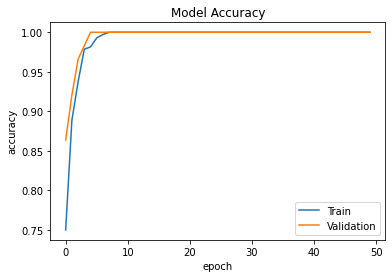

In [ ]:
plt.plot(check_accuracy.history['accuracy'])
plt.plot(check_accuracy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

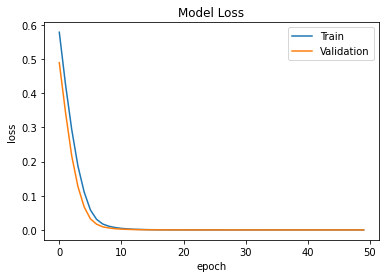

In [ ]:
plt.plot(check_accuracy.history['loss'])
plt.plot(check_accuracy.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Model loss is decreasing from the very beginning but it became constant after 15/20 Epoch

In [ ]:
# Model Evaluate
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.1747e-07 - accuracy: 1.0000


[1.1747136596795826e-07, 1.0]

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [ ]:
test_data.shape

(275, 4)

In [ ]:
test_data.shape[1]

4

In [ ]:
# Predict the Model on New Test DATA
predict = model.predict(test_data)

In [ ]:
# If value is more than threshold 0.5 it will give 1 otherwise 0
predict = [1 if x >= 0.5 else 0 for x in predict]

In [ ]:
res = pd.DataFrame(predict) # Save the Result as DataFrame
res.index = test_data.index # To Match the Index of Test New Data with the Predicted Value
res.columns = ["class"] # Column name as Class

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>